<a href="https://colab.research.google.com/github/jaemoi/sturdy-happiness/blob/main/%EB%B2%84%EC%8A%A4_%EC%9A%B4%ED%96%89%EC%8B%9C%EA%B0%84_%EC%98%88%EC%B8%A1_%EC%BD%94%EB%93%9C%EB%A6%AC%EB%B7%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## matplotlib 사용시 한국어 나오게 하는 코드

!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

font = fm.FontProperties(fname=fontpath, size=9)

fm._rebuild()

# 그래프에 retina display 적용

%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정

plt.rc('font', family='NanumBarunGothic') 



테스트 입니당~
남의 파일에 들어가서 수정할 수 있는지 확인 ㅎㅎ -이준연

/dev/null

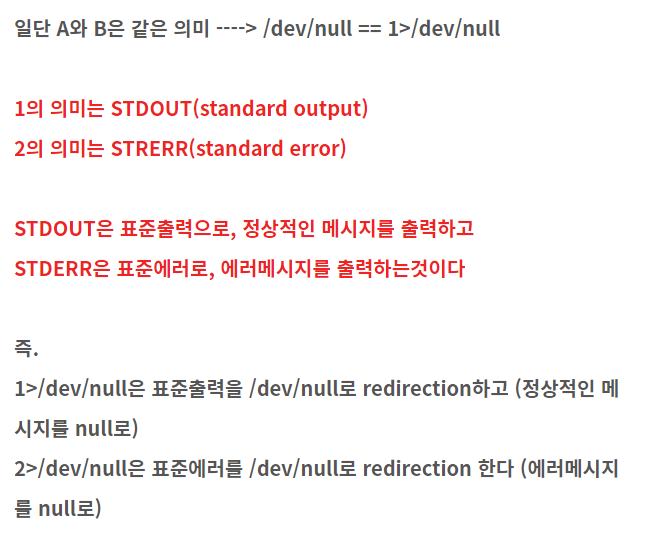

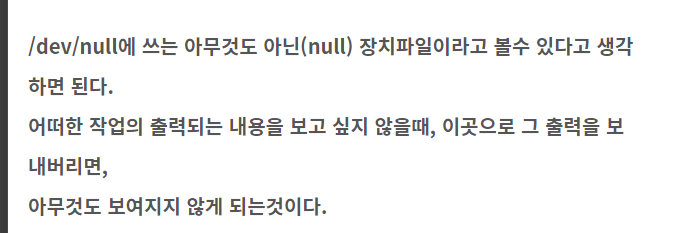

"Matplotlib"

Matplotlib는 파이썬에서 데이타를 차트나 플롯(Plot)으로 그려주는 라이브러리 패키지로서 가장 많이 사용되는 데이타 시각화(Data Visualization) 패키지로 알려져 있다.

Matplotlib는 라인 플롯, 바 차트, 파이차트, 히스토그램, Box Plot, Scatter Plot 등을 비롯하여 다양한 차트와 플롯 스타일을 지원하며, Matplotlib.org 갤러리 웹페이지에서 다양한 샘플 차트를 볼 수 있다.

In [2]:
import pandas as pd #판다스 패키지 불러오기
import lightgbm as lgb
import folium

folium은 지도를 시각화하는 패키지

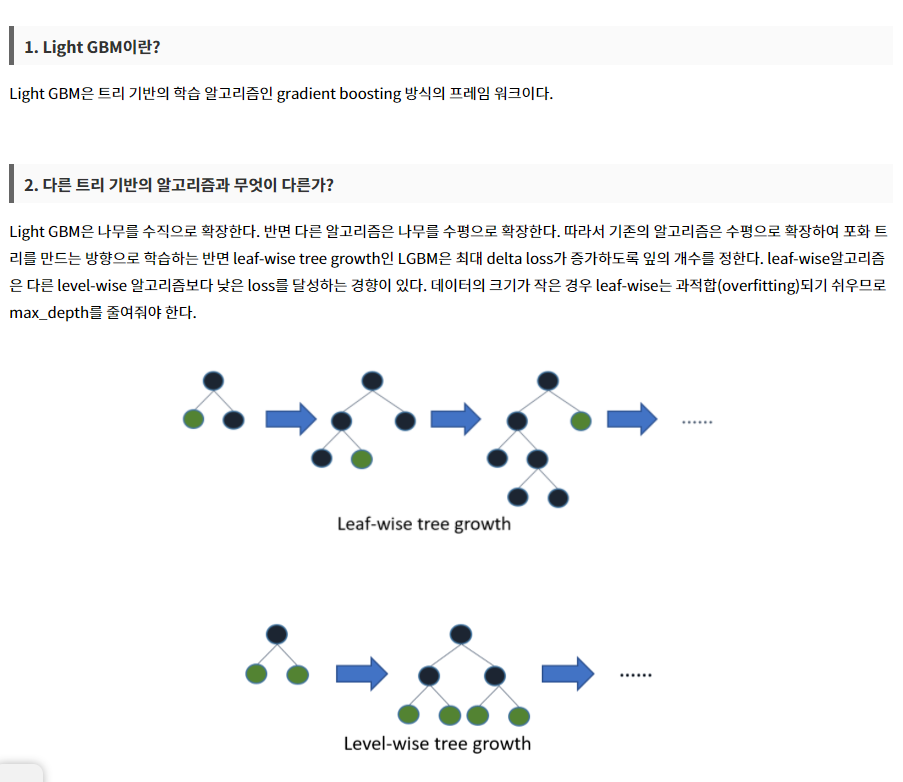

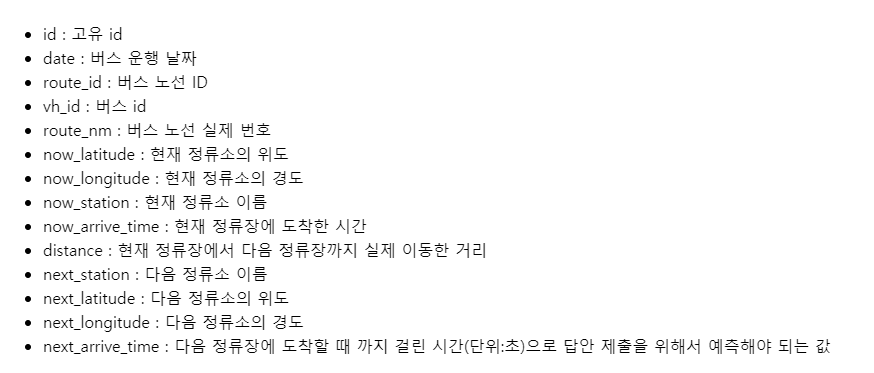

In [3]:
pd.read_csv("train.csv")

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38


In [4]:
pd.read_csv("test.csv")

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
0,210457,2019-10-29,405136001,7997025,360-1,33.457724,126.554014,제대마을,07시,333.0,제대아파트,33.458783,126.557353
1,210458,2019-10-29,405136001,7997025,360-1,33.458783,126.557353,제대아파트,07시,415.0,제주대학교,33.459893,126.561624
2,210459,2019-10-29,405136001,7997025,360-1,33.478867,126.483833,한라중학교/부영아파트,08시,417.0,대림2차아파트,33.478850,126.488350
3,210460,2019-10-29,405136001,7997025,360-1,33.478850,126.488350,대림2차아파트,08시,334.0,연동대림1차아파트,33.480700,126.489933
4,210461,2019-10-29,405136001,7997025,360-1,33.480700,126.489933,연동대림1차아파트,08시,550.0,케이티앤지,33.482077,126.485355
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91769,302350,2019-11-05,405328102,7983486,281-2,33.493625,126.534764,제주지방법원(광양방면),20시,272.0,고산동산(광양방면),33.495540,126.532907
91770,302351,2019-11-05,405328102,7983486,281-2,33.495540,126.532907,고산동산(광양방면),20시,447.0,제주시청(광양방면),33.498925,126.530351
91771,302352,2019-11-05,405328102,7983486,281-2,33.498925,126.530351,제주시청(광양방면),20시,418.0,광양사거리,33.500473,126.527103
91772,302353,2019-11-05,405328102,7983486,281-2,33.500473,126.527103,광양사거리,20시,140.0,탐라장애인 종합복지관,33.500228,126.525625


In [5]:
pd.read_csv("submission_제출양식.csv")

,id,next_arrive_time
0,210457,0
1,210458,0
2,210459,0
3,210460,0
4,210461,0
...,...,...
91769,302350,0
91770,302351,0
91771,302352,0
91772,302353,0


In [6]:
train = pd.read_csv("train.csv")

In [7]:
test = pd.read_csv("test.csv")

In [8]:
submission = pd.read_csv("submission_제출양식.csv")

In [9]:
train

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38


In [10]:
test

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
0,210457,2019-10-29,405136001,7997025,360-1,33.457724,126.554014,제대마을,07시,333.0,제대아파트,33.458783,126.557353
1,210458,2019-10-29,405136001,7997025,360-1,33.458783,126.557353,제대아파트,07시,415.0,제주대학교,33.459893,126.561624
2,210459,2019-10-29,405136001,7997025,360-1,33.478867,126.483833,한라중학교/부영아파트,08시,417.0,대림2차아파트,33.478850,126.488350
3,210460,2019-10-29,405136001,7997025,360-1,33.478850,126.488350,대림2차아파트,08시,334.0,연동대림1차아파트,33.480700,126.489933
4,210461,2019-10-29,405136001,7997025,360-1,33.480700,126.489933,연동대림1차아파트,08시,550.0,케이티앤지,33.482077,126.485355
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91769,302350,2019-11-05,405328102,7983486,281-2,33.493625,126.534764,제주지방법원(광양방면),20시,272.0,고산동산(광양방면),33.495540,126.532907
91770,302351,2019-11-05,405328102,7983486,281-2,33.495540,126.532907,고산동산(광양방면),20시,447.0,제주시청(광양방면),33.498925,126.530351
91771,302352,2019-11-05,405328102,7983486,281-2,33.498925,126.530351,제주시청(광양방면),20시,418.0,광양사거리,33.500473,126.527103
91772,302353,2019-11-05,405328102,7983486,281-2,33.500473,126.527103,광양사거리,20시,140.0,탐라장애인 종합복지관,33.500228,126.525625


In [11]:
submission

,id,next_arrive_time
0,210457,0
1,210458,0
2,210459,0
3,210460,0
4,210461,0
...,...,...
91769,302350,0
91770,302351,0
91771,302352,0
91772,302353,0


In [12]:
train.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64


In [13]:
train.tail()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38
210456,210456,2019-10-28,405328102,7983486,281-2,33.248487,126.511195,대륜동주민센터,21시,189.0,서귀포버스터미널(가상정류소),33.249091,126.509224,24


In [14]:
print(train['date'].min())
print(train['date'].max())
print(test['date'].min())
print(test['date'].max())

2019-10-15
2019-10-28
2019-10-29
2019-11-05


In [15]:
train.shape

(210457, 14)

In [16]:
test.shape

(91774, 13)

In [17]:
submission.shape

(91774, 2)

In [18]:
train.shape[0]

210457

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210457 entries, 0 to 210456
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                210457 non-null  int64  
 1   date              210457 non-null  object 
 2   route_id          210457 non-null  int64  
 3   vh_id             210457 non-null  int64  
 4   route_nm          210457 non-null  object 
 5   now_latitude      210457 non-null  float64
 6   now_longitude     210457 non-null  float64
 7   now_station       210457 non-null  object 
 8   now_arrive_time   210457 non-null  object 
 9   distance          210457 non-null  float64
 10  next_station      210457 non-null  object 
 11  next_latitude     210457 non-null  float64
 12  next_longitude    210457 non-null  float64
 13  next_arrive_time  210457 non-null  int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 22.5+ MB


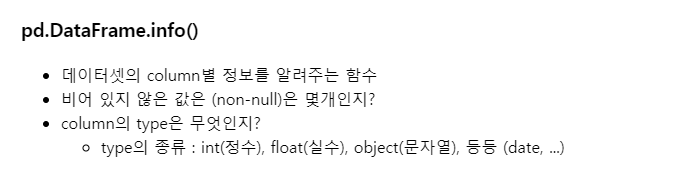

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91774 entries, 0 to 91773
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               91774 non-null  int64  
 1   date             91774 non-null  object 
 2   route_id         91774 non-null  int64  
 3   vh_id            91774 non-null  int64  
 4   route_nm         91774 non-null  object 
 5   now_latitude     91774 non-null  float64
 6   now_longitude    91774 non-null  float64
 7   now_station      91774 non-null  object 
 8   now_arrive_time  91774 non-null  object 
 9   distance         91774 non-null  float64
 10  next_station     91774 non-null  object 
 11  next_latitude    91774 non-null  float64
 12  next_longitude   91774 non-null  float64
dtypes: float64(5), int64(3), object(5)
memory usage: 9.1+ MB


In [21]:
len(train["now_station"].unique())

348

In [22]:
train[['route_id','vh_id']].drop_duplicates()

,route_id,vh_id
0,405136001,7997025
181,405136001,7997034
381,405136001,7997035
539,405136001,7997040
717,405136001,7997044
...,...,...
20226,405136522,7997004
26037,405320116,7983225
27098,405320122,7983067
45506,405328102,7983401


In [23]:
train[['route_id','vh_id']].drop_duplicates().groupby('route_id').count()

,vh_id
route_id,
405136001,10
405136002,5
405136007,1
405136012,3
405136521,6
405136522,15
405320111,3
405320112,5
405320113,1


In [24]:
train[["route_id","next_arrive_time"]]

,route_id,next_arrive_time
0,405136001,24
1,405136001,36
2,405136001,40
3,405136001,42
4,405136001,64
...,...,...
210452,405328102,96
210453,405328102,50
210454,405328102,16
210455,405328102,38


In [25]:
train[["route_id","next_arrive_time"]].groupby("route_id").mean()

,next_arrive_time
route_id,
405136001,92.063688
405136002,108.270852
405136007,94.172947
405136012,111.322633
405136521,114.673939
405136522,101.339188
405320111,68.901710
405320112,67.602392
405320113,68.403649


In [26]:
train.describe()

,id,route_id,vh_id,now_latitude,now_longitude,distance,next_latitude,next_longitude,next_arrive_time
count,210457.000000,2.104570e+05,2.104570e+05,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000
mean,105228.000000,4.052491e+08,7.988694e+06,33.434528,126.603451,490.256100,33.434711,126.603687,85.380824
std,60753.847139,9.132404e+04,6.774077e+03,0.102350,0.123961,520.563932,0.102224,0.123838,85.051170
min,0.000000,4.051360e+08,7.983000e+06,33.244382,126.473300,97.000000,33.244382,126.473300,6.000000
25%,52614.000000,4.051365e+08,7.983093e+06,33.325283,126.523900,291.000000,33.325283,126.524550,44.000000
50%,105228.000000,4.053201e+08,7.983431e+06,33.484667,126.551050,384.000000,33.484860,126.551050,66.000000
75%,157842.000000,4.053201e+08,7.997041e+06,33.500197,126.650322,542.000000,33.500228,126.650322,102.000000
max,210456.000000,4.053281e+08,7.997124e+06,33.556167,126.935188,7461.000000,33.556167,126.935188,2996.000000


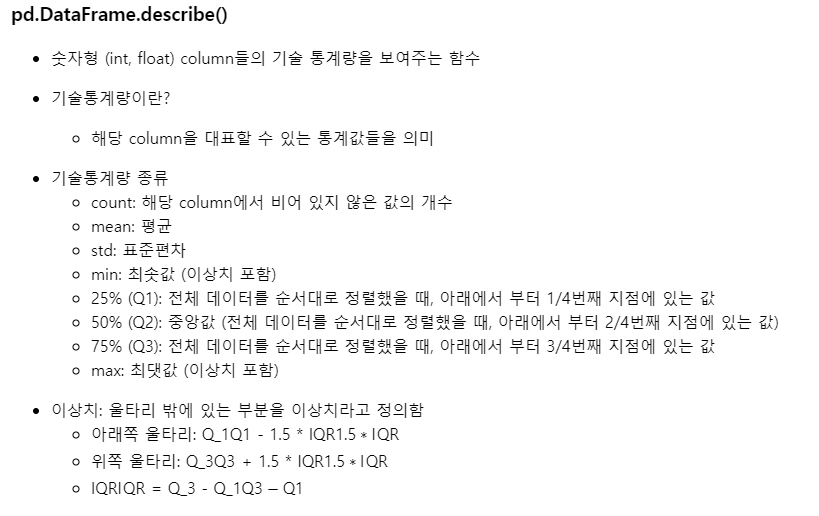

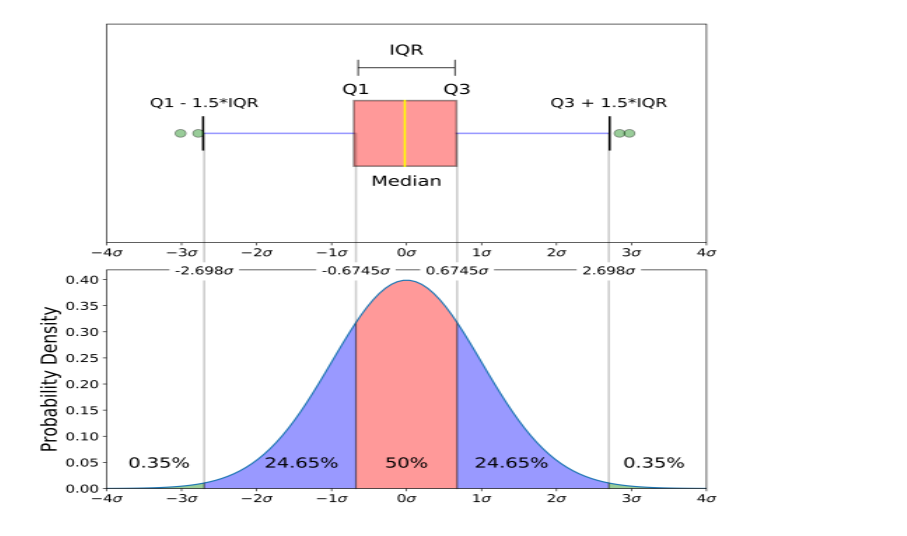

In [27]:
type(train.groupby(["id"]))

pandas.core.groupby.generic.DataFrameGroupBy

In [28]:
coord = [35.1559361, 129.1384361]
map_osm = folium.Map(location = coord)
map_osm

coord : 지도에서 좌표를 표시가 아니라
단순 변수임

In [29]:
map_osm = folium.Map(location=coord, zoom_start=12)
map_osm

In [30]:
map_osm = folium.Map(location = coord, tiles = 'Stamen Terrain')
map_osm

In [31]:
map_osm = folium.Map(location = coord, tiles = 'Stamen Toner')
map_osm

In [32]:
coord = [35.2335123, 129.0810047]

map_osm = folium.Map(location=coord, zoom_start=12)

folium.Marker(coord, popup='부산대학교', tooltip = '부산대학교 tooltip').add_to(map_osm) # 마커 생성 뒤 지도에 추가해주는 기능

map_osm.save('index.html')

map_osm

zoom_start= 은 줌인 하는 기능
popup 은 지도에 포인트 표시
tooltip은 마우스 올리면 부연 설명이 뜰 수 있께 하는 것

코랩은 한글이 잘 뜨지 않는데 index.html로 세이브하면 한글이 잘 뜬다고 합니다 데이콘 유투브에서

In [33]:
map_osm

default images: https://getbootstrap.com/docs/3.3/components/

- 검색 기능이 없다

fontawesome:https://fontawesome.com/icons?d=gallery

- 해당링크의 무료인것만 쓸 수 있음

In [34]:

map_osm = folium.Map(location=coord, zoom_start=12)
folium.Marker(coord, popup='부산대학교', icon=folium.Icon(icon='fire')).add_to(map_osm)
map_osm

In [35]:
map_osm = folium.Map(location=[37.541, 126.986], zoom_start=11)
folium.Marker([37.566345, 126.977893], popup='서울특별시청', icon=folium.Icon(color='red',icon='info-sign')).add_to(map_osm)
folium.Circle([37.4600, 126.9519], tooltip='서울대학교', radius=3000, color="green").add_to(map_osm)
folium.CircleMarker([37.5662, 126.9386], radius=10, popup='연세대학교',color="black", fill_color="crimson").add_to(map_osm)
map_osm

In [36]:
map_osm = folium.Map(location=[37.541, 126.986], zoom_start=11)
folium.RegularPolygonMarker([37.566345, 126.977893], popup='서울특별시청', fill_color='red',color='red', number_of_sides=3, radius=30, fill_opacity=0.2).add_to(map_osm)
folium.RegularPolygonMarker([37.4600, 126.9519], popup='서울대학교', fill_color='green',color='green', number_of_sides=4, radius=10, fill_opacity=0.2).add_to(map_osm)
folium.RegularPolygonMarker([37.5662, 126.9386], popup='연세대학교',fill_color='blue',color='blue', number_of_sides=6, radius=10).add_to(map_osm)
map_osm

number_of_sides= 표시할 도형 면의 개수
fill_opacity= 투명도 표시

In [37]:
map_data = train[['route_id','now_latitude','now_longitude','now_station']]
map_bus_route = map_data[map_data['route_id'] == 405320122].drop_duplicates("now_station")


map_osm = folium.Map(location=[33.4134, 126.5190], zoom_start = 10.5)

In [38]:
map_osm

In [39]:
map_data = train[['route_id','now_latitude','now_longitude','now_station']]
map_bus_route = map_data[map_data['route_id'] == 405320122].drop_duplicates("now_station")


map_osm = folium.Map(location=[33.4134, 126.5190], zoom_start = 10.5)

In [40]:
map_data = train[['route_id','now_latitude','now_longitude','now_station']]
map_bus_route = map_data[map_data['route_id'] == 405320122].drop_duplicates("now_station")


map_osm = folium.Map(location=[33.4134, 126.5190], zoom_start = 10.5)


for item in map_bus_route.index:
    lat = map_bus_route.loc[item,'now_latitude']
    long = map_bus_route.loc[item,'now_longitude']
    
    folium.Marker([lat,long], popup = map_bus_route.loc[item,'now_station'],
                      icon = folium.Icon(color = 'red', icon = 'info-sign')
                      ).add_to(map_osm)

map_osm.save('index.html')

map_osm